In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [15]:
boston=pd.read_csv('BostonHousing1.csv')

In [16]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

NameError: name 'boston_dataset' is not defined

In [17]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

C:\Users\prath\AppData\Local\Temp\ipykernel_9516\3156830788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['medv'], bins=30)


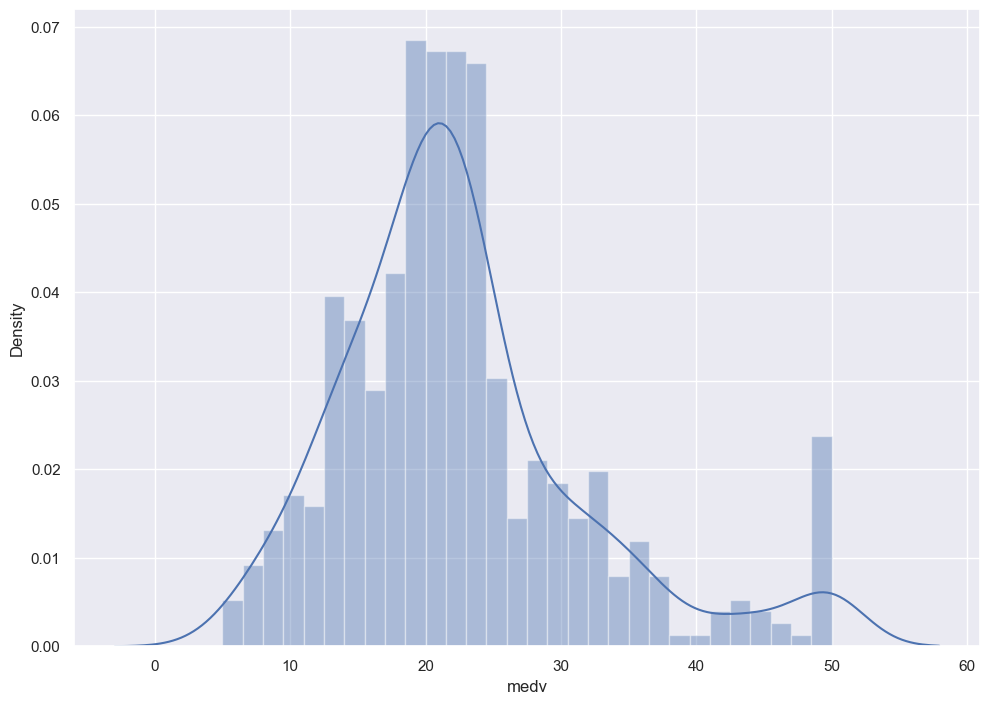

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(boston['medv'], bins=30)
plt.show()

In [19]:
correlation_matrix = boston.corr().round(2)

<Axes: >

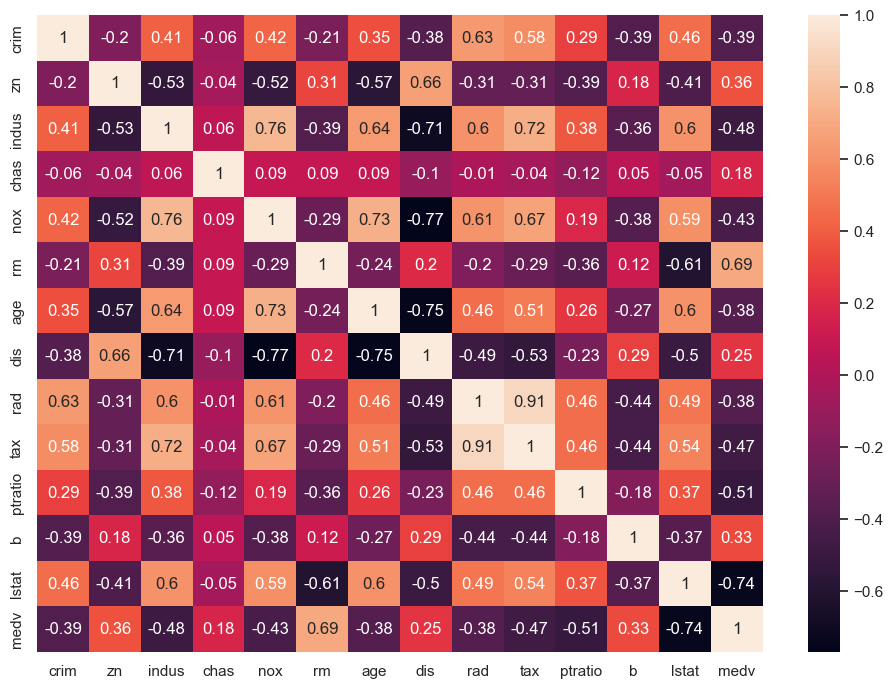

In [20]:
sns.heatmap(data = correlation_matrix, annot=True)

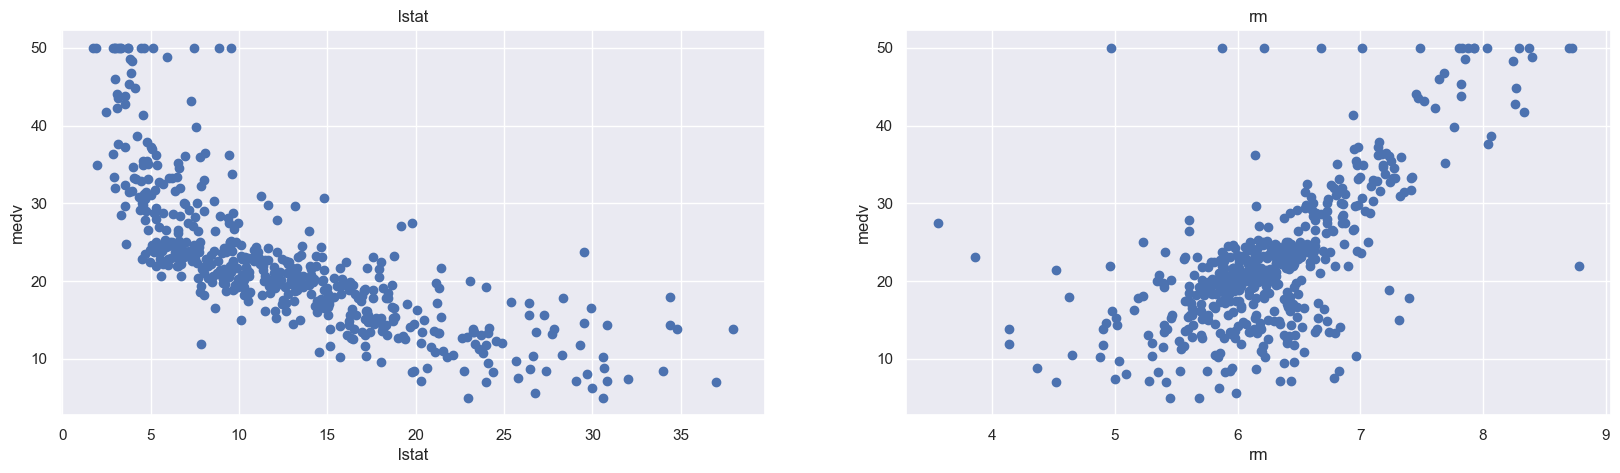

In [21]:
plt.figure(figsize=(20,5))

features = ["lstat", 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1,len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [22]:
X = pd.DataFrame(np.c_[boston['lstat'],boston['rm']], columns = ['lstat','rm'])
Y = boston['medv']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [27]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [25]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)

print("The model performance for testing set")
print("---------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))

r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("---------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
---------------------------------------
RMSE is 5.6230634015638685
R2 score is 0.6455618727875563
The model performance for testing set
---------------------------------------
RMSE is 5.288771166354861
R2 score is 0.5657028100598289


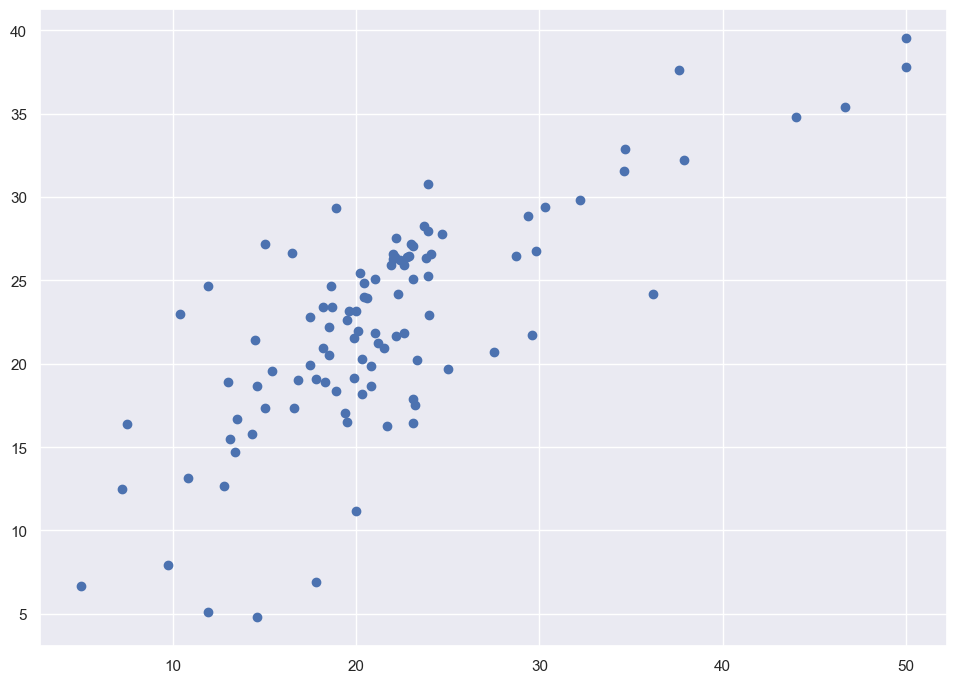

In [26]:
plt.scatter(Y_test,y_test_predict)
plt.show()